In [1]:
!pip install wget

# Model_0- Using 10% Data without Augmentation - val_accuracy: 0.85

In [2]:
import wget
url= "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip" 
myfile=wget.download(url)

100% [......................................................................] 168546183 / 168546183

In [3]:
import zipfile
data_ref= zipfile.ZipFile(myfile)
data_ref
data_ref.extractall()

In [4]:
train_data_10P= "10_food_classes_10_percent/train/"
test_data="10_food_classes_10_percent/test/"

train_data_10P

'10_food_classes_10_percent/train/'

In [5]:
def walk_through_directory(data_dir_name):
    import os
    for dir_path, dir_name, file_name in os.walk(data_dir_name):
        print(f"{len(dir_name)} -- {len(file_name)} -- {dir_path}")
              
walk_through_directory("10_food_classes_10_percent")

2 -- 0 -- 10_food_classes_10_percent
10 -- 0 -- 10_food_classes_10_percent\test
0 -- 250 -- 10_food_classes_10_percent\test\chicken_curry
0 -- 250 -- 10_food_classes_10_percent\test\chicken_wings
0 -- 250 -- 10_food_classes_10_percent\test\fried_rice
0 -- 250 -- 10_food_classes_10_percent\test\grilled_salmon
0 -- 250 -- 10_food_classes_10_percent\test\hamburger
0 -- 250 -- 10_food_classes_10_percent\test\ice_cream
0 -- 250 -- 10_food_classes_10_percent\test\pizza
0 -- 250 -- 10_food_classes_10_percent\test\ramen
0 -- 250 -- 10_food_classes_10_percent\test\steak
0 -- 250 -- 10_food_classes_10_percent\test\sushi
10 -- 0 -- 10_food_classes_10_percent\train
0 -- 75 -- 10_food_classes_10_percent\train\chicken_curry
0 -- 75 -- 10_food_classes_10_percent\train\chicken_wings
0 -- 75 -- 10_food_classes_10_percent\train\fried_rice
0 -- 75 -- 10_food_classes_10_percent\train\grilled_salmon
0 -- 75 -- 10_food_classes_10_percent\train\hamburger
0 -- 75 -- 10_food_classes_10_percent\train\ice_cream


In [6]:
#pip install keras~=2.6.0

In [7]:
#pip install tensorflow

In [8]:
#Crating the data input
import tensorflow as tf
train_data_10P_for_input= tf.keras.preprocessing.image_dataset_from_directory(directory=train_data_10P,
                                                                          image_size= (224,224),
                                                                          batch_size=32,
                                                                          label_mode="categorical"
                                                                          )

test_data_for_input= tf.keras.preprocessing.image_dataset_from_directory(directory=test_data,
                                                                        image_size=(224,224),
                                                                        label_mode="categorical",
                                                                        )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10P_for_input.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
#Create the model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze The model
base_model.trainable=False

#Create the input for base model
inputs=tf.keras.layers.Input(shape=(224,224,3), name="Input_Layer")

#pass the input layer into the base model
x=base_model(inputs)
print(f"Shape of the base model: {x.shape}")

#Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

#Create the output activation layrs
outputs=tf.keras.layers.Dense(10, activation="softmax")(x)
print((outputs.shape))

#compile the input & optput into the model
model_0=tf.keras.Model(inputs, outputs)

#compile the model
model_0.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

Shape of the base model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
(None, 10)


In [11]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [12]:
#Fit the model
history_model0=model_0.fit(train_data_10P_for_input,
                           epochs=5,
                           steps_per_epoch=len(train_data_10P_for_input),
                           validation_steps=int(0.25* len(test_data_for_input)),
                           validation_data=test_data_for_input,
                            callbacks=[create_tensorboard_callback(dir_name="Transfer_learning",
                                                                  experiment_name= "10% Data without Augmentation")])

Saving TensorBoard log files to: Transfer_learning/10% Data without Augmentation/20220609-041238
Epoch 1/5
 1/24 [>.............................] - ETA: 0s - loss: 2.3938 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\Dilip Kumar\.conda\envs\1env\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
24/24 [==============================] - 87s 4s/step - loss: 1.8712 - accuracy: 0.4347 - val_loss: 1.3456 - val_accuracy: 0.7039
Epoch 2/5
24/24 [==============================] - 73s 3s/step - loss: 1.1417 - accuracy: 0.7400 - val_loss: 0.9245 - val_accuracy: 0.7829
Epoch 3/5
24/24 [==============================] - 73s 3s/step - loss: 0.8231 - accuracy: 0.8213 - val_loss: 0.7710 - val_accuracy: 0.8043
Epoch 4/5
24/24 [==============================] - 283s 12s/step - loss: 0.6874 - accuracy: 0.8413 - val_loss

In [13]:
model_0.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [14]:
model_0.evaluate(test_data_for_input)

79/79 [==============================] - 168s 2s/step - loss: 0.6178 - accuracy: 0.8368


[0.6178471446037292, 0.8367999792098999]

In [15]:
#!pip install matplotlib

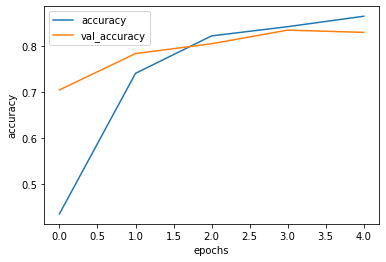

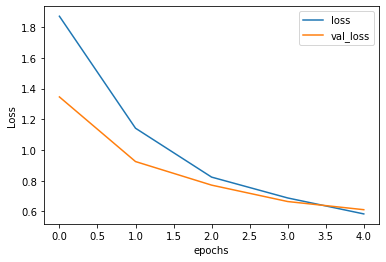

In [16]:
def plot_the_history(model_history):
    
    import matplotlib.pyplot as plt
    
    accuracy=model_history.history['accuracy']
    val_accuracy=model_history.history['val_accuracy']
    
    loss=model_history.history['loss']
    val_loss=model_history.history['val_loss']
    
    epochs= range(len(model_history.history['loss']))
    
    plt.plot(epochs, accuracy, label="accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.legend();
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, label="loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.legend();
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    
    
    
plot_the_history(history_model0)

# Model_1 - 1% Data with Augmentation layer - val_accuracy: 10

In [17]:
def download_url(url):
    import wget
    myfile=wget.download(url)

    
def unzip_file(myfile):
    import zipfile
    data_ref= zipfile.ZipFile(myfile)
    data_ref
    data_ref.extractall()

In [18]:
download_url("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip")

100% [......................................................................] 133612354 / 133612354

In [19]:
unzip_file("10_food_classes_1_percent.zip")

In [20]:
train_data1P= "10_food_classes_1_percent/train/"
test_data="10_food_classes_1_percent/test/"

In [21]:
walk_through_directory("10_food_classes_1_percent")

2 -- 0 -- 10_food_classes_1_percent
10 -- 0 -- 10_food_classes_1_percent\test
0 -- 250 -- 10_food_classes_1_percent\test\chicken_curry
0 -- 250 -- 10_food_classes_1_percent\test\chicken_wings
0 -- 250 -- 10_food_classes_1_percent\test\fried_rice
0 -- 250 -- 10_food_classes_1_percent\test\grilled_salmon
0 -- 250 -- 10_food_classes_1_percent\test\hamburger
0 -- 250 -- 10_food_classes_1_percent\test\ice_cream
0 -- 250 -- 10_food_classes_1_percent\test\pizza
0 -- 250 -- 10_food_classes_1_percent\test\ramen
0 -- 250 -- 10_food_classes_1_percent\test\steak
0 -- 250 -- 10_food_classes_1_percent\test\sushi
10 -- 0 -- 10_food_classes_1_percent\train
0 -- 7 -- 10_food_classes_1_percent\train\chicken_curry
0 -- 7 -- 10_food_classes_1_percent\train\chicken_wings
0 -- 7 -- 10_food_classes_1_percent\train\fried_rice
0 -- 7 -- 10_food_classes_1_percent\train\grilled_salmon
0 -- 7 -- 10_food_classes_1_percent\train\hamburger
0 -- 7 -- 10_food_classes_1_percent\train\ice_cream
0 -- 7 -- 10_food_classes

In [22]:
#Creating input_data
train_data1P_for_input= tf.keras.preprocessing.image_dataset_from_directory(train_data1P,
                                                                           batch_size=32,
                                                                           image_size=(224,224),
                                                                           label_mode="categorical")
test_data_for_input=tf.keras.preprocessing.image_dataset_from_directory(test_data,
                                                                       image_size=(224,224),
                                                                       label_mode="categorical")

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [23]:
train_data1P_for_input.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [24]:
def plot_aug_image(directory, data_aug_layer, input_train_data):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import os
    import random
    import numpy as np

    target_class= random.choice(input_train_data.class_names) #target the random class
    target_dir=directory + target_class  #target the dir
    random_img= random.choice(os.listdir(target_dir)) #choose the random image
    random_img_path=target_dir + "/" + random_img
    img=mpimg.imread(random_img_path)
    plt.imshow(img);
    plt.title("Original_Randmom_img")
    plt.axis(False);

    #Plot the augementation Img
    aug_img= data_aug_layer(tf.expand_dims(img, axis=0))
    plt.figure()
    plt.imshow(tf.squeeze(aug_img)/255.)
    plt.title("Augemented Img")
    plt.axis(False);

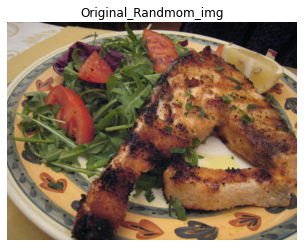

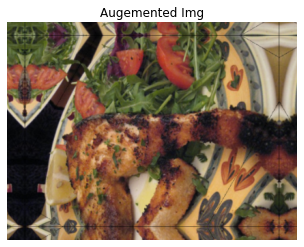

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation_for_model1= tf.keras.Sequential([

  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
 
    
], name ="data_augmentation")


plot_aug_image(directory="10_food_classes_1_percent/train/", data_aug_layer= data_augmentation_for_model1, input_train_data=train_data1P_for_input)


In [26]:
#Create the model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze The model
base_model.trainable=False

#Create the input for base model
inputs=tf.keras.layers.Input(shape=(224,224,3), name="Input_Layer")

#Pass the aug_layers through base_model 
x=data_augmentation_for_model1(inputs)

#pass the input layer into the base model
x=base_model(x, training=False)
print(f"Shape of the base model: {x.shape}")

#Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

#Create the output activation layrs
outputs=tf.keras.layers.Dense(10, activation="softmax")(x)

#compile the input & optput into the model
model1_precent_with_aug=tf.keras.Model(inputs, outputs)

#compile the model
model1_precent_with_aug.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


Shape of the base model: (None, None, None, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [27]:
model1_precent_with_aug.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [28]:
#fit the model
history_model1_precent_with_aug= model1_precent_with_aug.fit(train_data1P_for_input,
                              epochs=5,
                              steps_per_epoch= len(train_data1P_for_input),
                              validation_data=test_data_for_input,
                              validation_steps=int(0.25* len(test_data_for_input)),
                               
                              callbacks=[create_tensorboard_callback(dir_name="Transfer_learning",
                                                                      experiment_name="1P_data_aug"
                                                                     )]
                              )

Saving TensorBoard log files to: Transfer_learning/1P_data_aug/20220609-042640
Epoch 1/5
3/3 [==============================] - 52s 17s/step - loss: 2.3908 - accuracy: 0.0857 - val_loss: 2.2509 - val_accuracy: 0.1299
Epoch 2/5
3/3 [==============================] - 38s 13s/step - loss: 2.1807 - accuracy: 0.2000 - val_loss: 2.1435 - val_accuracy: 0.2220
Epoch 3/5
3/3 [==============================] - 37s 12s/step - loss: 1.9732 - accuracy: 0.3000 - val_loss: 2.0187 - val_accuracy: 0.2928
Epoch 4/5
3/3 [==============================] - 38s 13s/step - loss: 1.7775 - accuracy: 0.5143 - val_loss: 1.9290 - val_accuracy: 0.3865
Epoch 5/5
3/3 [==============================] - 37s 12s/step - loss: 1.6951 - accuracy: 0.5857 - val_loss: 1.8515 - val_accuracy: 0.4474


In [29]:
#Set the checkpoint Path
checkpoint_path="10_precent_model_checkpoint_weight/checkpoint.ckpt"

#Create the model_check_point
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                      save_weights_only=True,
                                                      save_best_only=False,
                                                      save_freq="epoch",
                                                verbose=1)

# Model_11 - 1% Data without Augmentation layer - val_accuracy: 50%

In [30]:
#Create the model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze The model
base_model.trainable=False

#Create the input for base model
inputs=tf.keras.layers.Input(shape=(224,224,3), name="Input_Layer")

#pass the input layer into the base model
x=base_model(inputs)
print(f"Shape of the base model: {x.shape}")

#Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

#Create the output activation layrs
outputs=tf.keras.layers.Dense(10, activation="softmax")(x)

#compile the input & optput into the model
model1_precent_without_aug=tf.keras.Model(inputs, outputs)

#compile the model
model1_precent_without_aug.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


Shape of the base model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)


In [31]:
#Fit the model
history_model1_precent_wihtout_aug=model1_precent_without_aug.fit(train_data1P_for_input,
                           epochs=5,
                           steps_per_epoch=len(train_data1P_for_input),
                           validation_steps=int(0.25* len(test_data_for_input)),
                           validation_data=test_data_for_input,
                           callbacks=[create_tensorboard_callback(dir_name="Transfer_learning",
                                                                  experiment_name= "1% Data without data_Augmentation")])

Saving TensorBoard log files to: Transfer_learning/1% Data without data_Augmentation/20220609-043022
Epoch 1/5
3/3 [==============================] - 39s 13s/step - loss: 2.3899 - accuracy: 0.1000 - val_loss: 2.1734 - val_accuracy: 0.2171
Epoch 2/5
3/3 [==============================] - 37s 12s/step - loss: 2.1127 - accuracy: 0.2571 - val_loss: 2.0175 - val_accuracy: 0.3372
Epoch 3/5
3/3 [==============================] - 37s 12s/step - loss: 1.8391 - accuracy: 0.5000 - val_loss: 1.9040 - val_accuracy: 0.4013
Epoch 4/5
3/3 [==============================] - 37s 12s/step - loss: 1.6545 - accuracy: 0.6429 - val_loss: 1.7938 - val_accuracy: 0.4753
Epoch 5/5
3/3 [==============================] - 37s 12s/step - loss: 1.4515 - accuracy: 0.8429 - val_loss: 1.7069 - val_accuracy: 0.5247


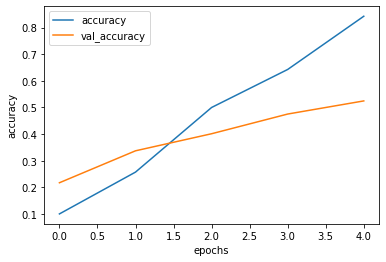

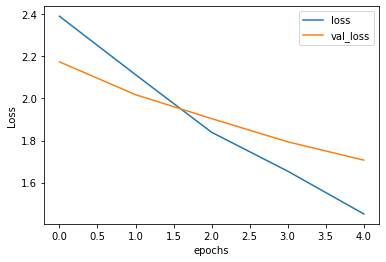

In [32]:
plot_the_history(history_model1_precent_wihtout_aug)

In [33]:
model0_evaluation= model_0.evaluate(test_data_for_input) #10% data without data_aug

79/79 [==============================] - 153s 2s/step - loss: 0.6178 - accuracy: 0.8368


In [34]:
model1_with_aug_evaluation= model1_precent_with_aug.evaluate(test_data_for_input) #1% data only with data_aug

79/79 [==============================] - 143s 2s/step - loss: 1.8550 - accuracy: 0.4392


In [35]:
midel1_without_aug_evaluation= model1_precent_without_aug.evaluate(test_data_for_input) #1% data only without data_aug

79/79 [==============================] - 137s 2s/step - loss: 1.7079 - accuracy: 0.5228


# Model_01 - 10% Data with Augmentation layer - val_accuracy:

In [36]:
download_url("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip")

100% [......................................................................] 168546183 / 168546183

In [37]:
unzip_file("10_food_classes_10_percent.zip")

In [38]:
train_data_10P= "10_food_classes_10_percent/train/"
test_data="10_food_classes_10_percent/test/"

train_data_10P

'10_food_classes_10_percent/train/'

In [39]:
#Create the data input
train_data10P_for_input = tf.keras.preprocessing.image_dataset_from_directory(train_data_10P,
                                                                              batch_size=32,
                                                                              label_mode="categorical",
                                                                              image_size=(224,224)
                                                                              )

test_data_for_input=tf.keras.preprocessing.image_dataset_from_directory(test_data,
                                                                       label_mode="categorical",
                                                                       image_size=(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


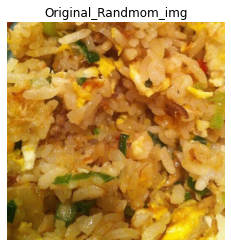

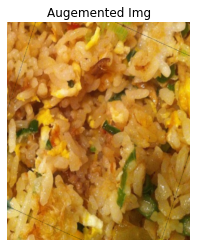

In [40]:
#create Data augmentation

from tensorflow.keras.layers.experimental import preprocessing

data_augmentation_for_model01=tf.keras.Sequential([
   
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomWidth(0.2),
    
      preprocessing.RandomHeight(0.2),
    
])

plot_aug_image(directory="10_food_classes_1_percent/train/", data_aug_layer= data_augmentation_for_model01, input_train_data=train_data10P_for_input)

In [41]:
#Create the model & compile the model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#Create input layer
inputs=tf.keras.layers.Input(shape=(224,224,3), name="Input_layer")

#Pass this input through base_model
x=data_augmentation_for_model01(inputs)

#pass this data_aug layer through base_model
x=base_model(x, training=False)

#create the GlobalAveragePooling layer
x=tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D_layer")(x)

#create the output layer
outputs=tf.keras.layers.Dense(10, activation="softmax", name="Output_layer")(x)

model10_precent_with_aug= tf.keras.Model(inputs, outputs)

#Compile the model
model10_precent_with_aug.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

In [42]:
#Fit the model
initial_epochs= 5

history_model10_precent_with_aug=model10_precent_with_aug.fit(train_data10P_for_input,
                           epochs=initial_epochs,
                           steps_per_epoch=len(train_data10P_for_input),
                           validation_steps=int(0.25* len(test_data_for_input)),
                           validation_data=test_data_for_input,
                           callbacks=[create_tensorboard_callback(dir_name="Transfer_learning",
                                                                  experiment_name= "10% Data with Augmentation"),
                                     checkpoint_callback])

Saving TensorBoard log files to: Transfer_learning/10% Data with Augmentation/20220609-044212
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9302 - accuracy: 0.4067
Epoch 00001: saving model to 10_precent_model_checkpoint_weight\checkpoint.ckpt
24/24 [==============================] - 101s 4s/step - loss: 1.9302 - accuracy: 0.4067 - val_loss: 1.4239 - val_accuracy: 0.6809
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2552 - accuracy: 0.7013
Epoch 00002: saving model to 10_precent_model_checkpoint_weight\checkpoint.ckpt
24/24 [==============================] - 87s 4s/step - loss: 1.2552 - accuracy: 0.7013 - val_loss: 1.0215 - val_accuracy: 0.7500
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9613 - accuracy: 0.7773
Epoch 00003: saving model to 10_precent_model_checkpoint_weight\checkpoint.ckpt
24/24 [==============================] - 90s 4s/step - loss: 0.9613 - accuracy: 0.7773 - val_loss: 0.8303 - val_accuracy: 0.7977

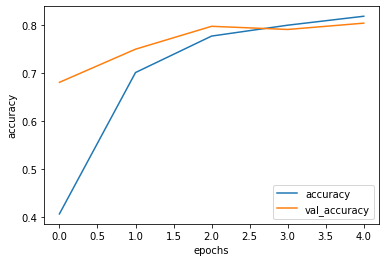

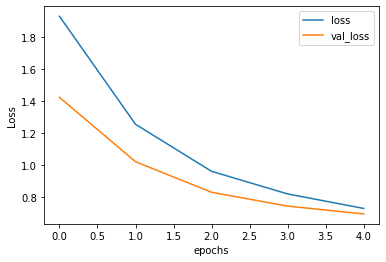

In [43]:
plot_the_history(history_model10_precent_with_aug)

In [44]:
model10_precent_with_aug_evaluation= model10_precent_with_aug.evaluate(test_data_for_input)

79/79 [==============================] - 175s 2s/step - loss: 0.6775 - accuracy: 0.8132


In [45]:
model10_precent_with_aug.load_weights(checkpoint_path)

In [46]:
model10_precent_with_aug_evaluation_load_weight= model10_precent_with_aug.evaluate(test_data_for_input)

79/79 [==============================] - 140s 2s/step - loss: 0.6775 - accuracy: 0.8132


In [47]:
model10_precent_with_aug_evaluation == model10_precent_with_aug_evaluation_load_weight

False

In [48]:
import numpy as np
np.isclose(np.array(model10_precent_with_aug_evaluation), np.array(model10_precent_with_aug_evaluation_load_weight))

array([ True,  True])

## Model_02: Fine-tuning an existing model ( model10_precent_with_aug.evaluate) on 10% of the data

In [49]:
# Layers in loaded model
model10_precent_with_aug.layers

In [50]:
for layers in model10_precent_with_aug.layers:
    print(layers, layers.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000002C8EF18EB50> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x000002C8EF024BE0> True
<tensorflow.python.keras.engine.functional.Functional object at 0x000002C8EF5DC7F0> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x000002C8EF659070> True
<tensorflow.python.keras.layers.core.Dense object at 0x000002C8EF658910> True


In [51]:
model10_precent_with_aug.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
GlobalAveragePooling2D_layer (None, 1280)              0         
_________________________________________________________________
Output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [52]:
print(len(model10_precent_with_aug.layers[2].trainable_variables)) ## layer at index 2 is the EfficientNetB0 layer (the base model)

0


In [53]:

print(len(base_model.trainable_variables)) #This is the same as our base model.

0


In [54]:
#for i, layers in enumerate(base_model.layers):
#   print(i, layers.name, layers.trainable)

In [55]:
base_model.trainable=True

for layers in base_model.layers[:-10]:
    layers.trainable=False
    

In [56]:
#for i, layers in enumerate(base_model.layers):
#   print(i, layers.name, layers.trainable )

In [57]:
model10_precent_with_aug.compile(loss="categorical_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                          metrics=["accuracy"])


In [58]:
print(len(model10_precent_with_aug.trainable_variables))

12


In [59]:
history_model10_precent_with_aug.epoch[-1]

4

In [60]:
history_model10_precent_with_aug.epoch[-2:]

[3, 4]

In [61]:
fine_tune_epochs=initial_epochs+5

history_model10_precent_with_aug_finetune= model10_precent_with_aug.fit(train_data10P_for_input,
                                                                        epochs=fine_tune_epochs,
                                                                        
                                                                       validation_data=test_data_for_input,
                                                                       validation_steps=int(0.25*len(test_data_for_input)),
                                                                       initial_epoch= history_model10_precent_with_aug.epoch[-1],
                                                                       callbacks=[create_tensorboard_callback("Transfer_learning", "model10_precent_aug_finetune")]
                                                                        
                                                                                          )

Saving TensorBoard log files to: Transfer_learning/model10_precent_aug_finetune/20220609-045541
Epoch 5/10
24/24 [==============================] - 100s 4s/step - loss: 0.5989 - accuracy: 0.8427 - val_loss: 0.5273 - val_accuracy: 0.8191
Epoch 6/10
24/24 [==============================] - 89s 4s/step - loss: 0.4763 - accuracy: 0.8613 - val_loss: 0.5183 - val_accuracy: 0.8059
Epoch 7/10
24/24 [==============================] - 86s 4s/step - loss: 0.4286 - accuracy: 0.8840 - val_loss: 0.5286 - val_accuracy: 0.8191
Epoch 8/10
24/24 [==============================] - 79s 3s/step - loss: 0.3758 - accuracy: 0.8880 - val_loss: 0.4992 - val_accuracy: 0.8174
Epoch 9/10
24/24 [==============================] - 75s 3s/step - loss: 0.3392 - accuracy: 0.8973 - val_loss: 0.5120 - val_accuracy: 0.8191
Epoch 10/10
24/24 [==============================] - 79s 3s/step - loss: 0.3021 - accuracy: 0.9027 - val_loss: 0.5090 - val_accuracy: 0.8224


In [62]:
model10_precent_with_aug_evaluation

[0.6775103807449341, 0.8131999969482422]

In [63]:
model10_precent_with_aug_finetune_evaluation= model10_precent_with_aug.evaluate(test_data_for_input)

79/79 [==============================] - 149s 2s/step - loss: 0.4929 - accuracy: 0.8324


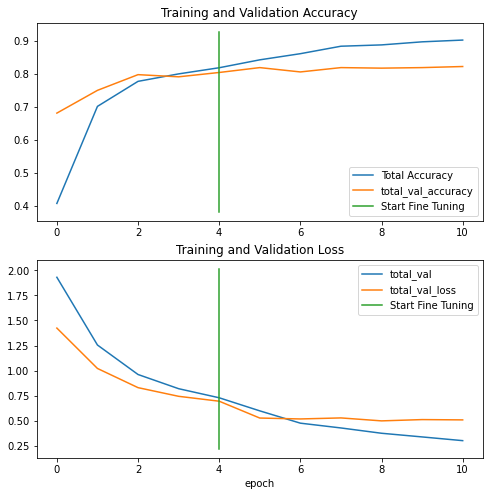

In [65]:
def plot_history_for_finetune(original_history, new_history, initial_epochs=5):
    
    import matplotlib.pyplot as plt
    
    accuracy=original_history.history["accuracy"]
    loss=    original_history.history['loss']
    
    val_accuracy= original_history.history["val_accuracy"]
    val_loss=     original_history.history["val_loss"]
    
    total_accuracy=accuracy + new_history.history['accuracy']
    total_loss=    loss     + new_history.history['loss']
    
    total_val_accuracy= val_accuracy + new_history.history['val_accuracy']
    total_val_loss=     val_loss     + new_history.history["val_loss"]
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    
    plt.plot(total_accuracy, label="Total Accuracy")
    plt.plot(total_val_accuracy, label="total_val_accuracy")
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label="total_val")
    plt.plot(total_val_loss, label="total_val_loss")
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    

plot_history_for_finetune(original_history=history_model10_precent_with_aug, 
                 new_history=history_model10_precent_with_aug_finetune, 
                 initial_epochs=5)

# Model_03: Fine-tuning an existing model all of the data

In [91]:
import wget

All_data= wget.download("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip") 


100% [......................................................................] 519183241 / 519183241

In [92]:
unzip_file("10_food_classes_all_data.zip")

In [93]:
all_train_data_ref= "10_food_classes_all_data/train/"
all_test_data_ref=  "10_food_classes_all_data/test/"

all_test_data_ref

'10_food_classes_all_data/test/'

In [95]:
#set_up_the_data_input
import tensorflow as tf

all_train_data_for_input= tf.keras.preprocessing.image_dataset_from_directory(all_train_data_ref,
                                                                         image_size=(224,224),
                                                                         label_mode="categorical")

all_test_data_for_input=tf.keras.preprocessing.image_dataset_from_directory(all_test_data_ref,
                                                                           label_mode="categorical",
                                                                           image_size=(224,224))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [98]:
model10_precent_with_aug.load_weights(checkpoint_path)

In [99]:
model10_precent_with_aug.evaluate(test_data_for_input) #evaluate the model

79/79 [==============================] - 157s 2s/step - loss: 0.6775 - accuracy: 0.8132


[0.6775104999542236, 0.8131999969482422]

In [100]:
model10_precent_with_aug_evaluation #check if your model reverted back feature extraction layers

[0.6775103807449341, 0.8131999969482422]

In [104]:
for i, layers in enumerate(model10_precent_with_aug.layers):
    print(i, layers.name, layers.trainable)

0 Input_layer True
1 sequential True
2 efficientnetb0 True
3 GlobalAveragePooling2D_layer True
4 Output_layer True


In [105]:
#compile the model
model10_precent_with_aug.compile(loss="categorical_crossentropy",
                          metrics=["accuracy"],
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001))

In [106]:

fine_tune_epochs = initial_epochs+5
history_all_data_with_finetune= model10_precent_with_aug.fit(all_train_data_for_input,
                                                             validation_data=all_test_data_for_input,
                                                             validation_steps=len(all_test_data_for_input),
                                                             initial_epoch=history_model10_precent_with_aug.epoch[-1],
                                                             epochs=fine_tune_epochs,
                                                            callbacks=[create_tensorboard_callback("Transfer_learning", "all_data_with_finetune")])


Saving TensorBoard log files to: Transfer_learning/all_data_with_finetune/20220609-084123
Epoch 5/10
235/235 [==============================] - 679s 3s/step - loss: 0.6804 - accuracy: 0.7829 - val_loss: 0.3888 - val_accuracy: 0.8712
Epoch 6/10
235/235 [==============================] - 717s 3s/step - loss: 0.5390 - accuracy: 0.8248 - val_loss: 0.3620 - val_accuracy: 0.8804
Epoch 7/10
235/235 [==============================] - 714s 3s/step - loss: 0.4792 - accuracy: 0.8472 - val_loss: 0.3220 - val_accuracy: 0.8960
Epoch 8/10
235/235 [==============================] - 677s 3s/step - loss: 0.4322 - accuracy: 0.8615 - val_loss: 0.3112 - val_accuracy: 0.8980
Epoch 9/10
235/235 [==============================] - 698s 3s/step - loss: 0.3977 - accuracy: 0.8760 - val_loss: 0.2966 - val_accuracy: 0.9028
Epoch 10/10
235/235 [==============================] - 678s 3s/step - loss: 0.3680 - accuracy: 0.8823 - val_loss: 0.2863 - val_accuracy: 0.9092


In [107]:
#Model Evaluation
model10_precent_with_aug.evaluate(test_data_for_input)

79/79 [==============================] - 163s 2s/step - loss: 0.2863 - accuracy: 0.9092


[0.2863170802593231, 0.9092000126838684]

In [ ]:
#Plot the history
plot_history_for_finetune(original_history=history_model10_precent_with_aug, 
                 new_history=history_all_data_with_finetune, 
                 initial_epochs=5)

In [ ]:
#let view our experiment data on tensorBoard
!tensorboard dev upload --logdir ./Transfer_learning \
  --name "Transfer_learning_experiment" \
  --description "Transfer_learning_expriement_with_featute_extraction_and_finetuning" \
  --one_shot 